In [264]:
import cv2
import skimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from scipy.ndimage.filters import convolve

(353, 454)


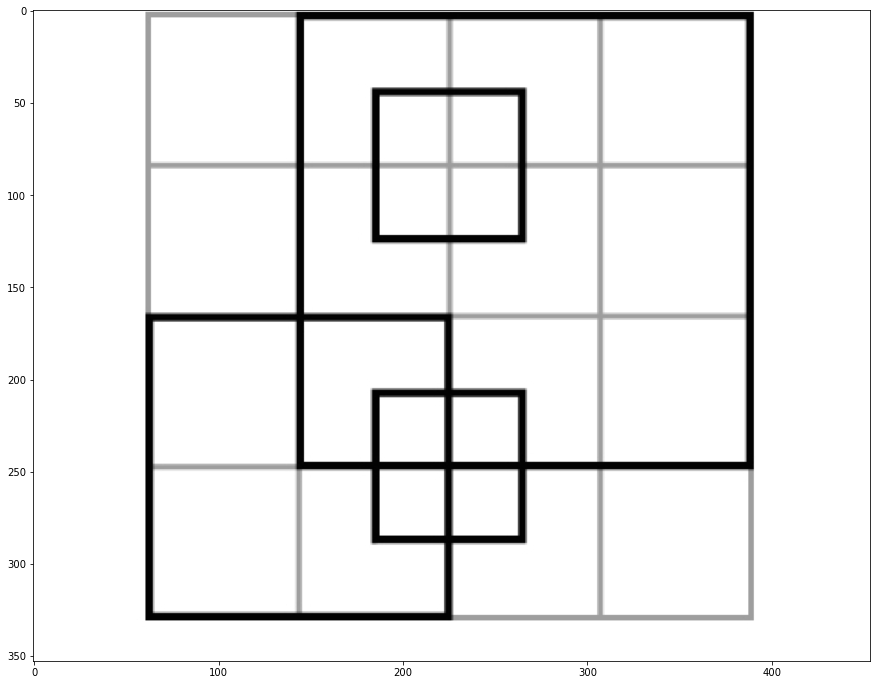

In [259]:
img = cv2.imread('images//box.jpg',2)
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(img,cmap="gray")
plt.show()

Steps:
- Load image, convert to grayscale.
- Calculate derivatives of every pixel.
- Setup the structure tensor.
- Calculate R score - harris response values.
- Find edges by finding local maximas

In [260]:
def linearGaussianKernel(size,sigma=1.0):
    boundary_vals = int(size)//2
    x = np.arange(-boundary_vals,boundary_vals+1)
    normal = 1.0/(2.0*np.pi*sigma**2)
    kernel = np.exp(-((x**2) / (2.0*sigma**2))) * normal
    kernel = np.expand_dims(kernel,axis=0)
    return kernel

def applyBlurring(img,kernel_size=5,sigma=1.0):
    img = img.astype(np.int32)
    img_smoothed_vertical = convolve(img,np.transpose(linearGaussianKernel(kernel_size,sigma)))
    img_smoothed = convolve(img_smoothed_vertical,linearGaussianKernel(kernel_size,sigma)*10)
    img_smoothed = img_smoothed/img_smoothed.max() * 255.0
    return img_smoothed

In [261]:
def applySobelFiltersXY(img):
    kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)   
    ix = convolve(img,kx)
    iy = convolve(img,ky)
    
    return ix,iy

In [262]:
from skimage.feature import peak_local_max

def findCorners(img, alpha=0.05):
    ix, iy = applySobelFiltersXY(img)
    ix,iy = applyBlurring(ix), applyBlurring(iy)
    ixy = applyBlurring(ix*iy)
    print(ix.shape,iy.shape)
    det_M = ix**2*iy**2-ixy**2
    trace_M = ix**2+iy**2
    R_score = det_M - alpha*trace_M**2
    R_score[R_score<0.0] = 0
    coordinates = peak_local_max(R_score, min_distance=5)
    return coordinates
    ## dla kazdego punktu ix,iy

(353, 454) (353, 454)


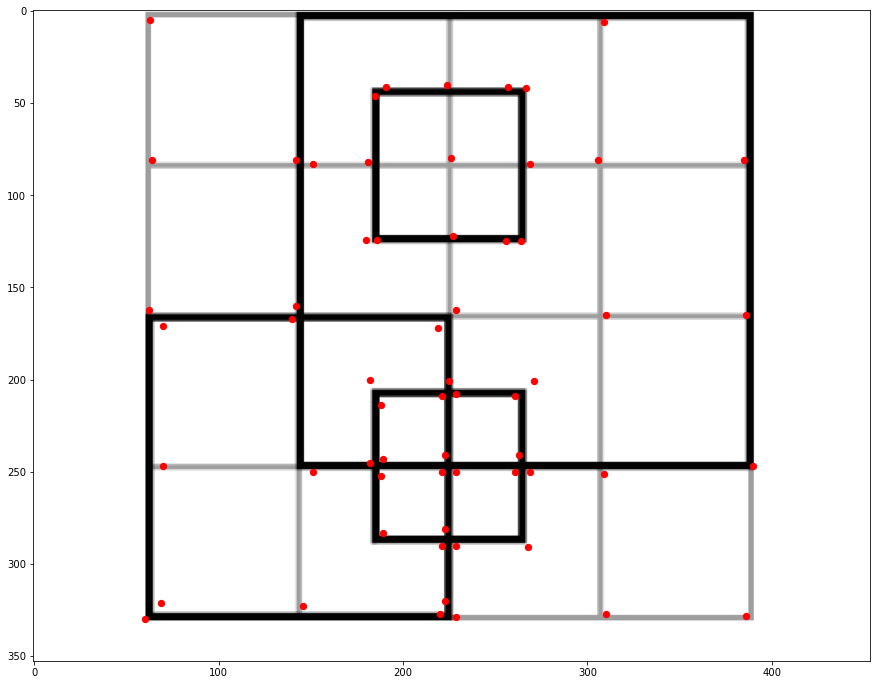

In [263]:
img = cv2.imread('images//box.jpg',2)
corners = findCorners(img)
plt.figure(figsize=(15,15))
plt.imshow(img,cmap="gray")
plt.scatter(x=coordinates[:,1], y=coordinates[:,0], c='r', s=40)
plt.show()